# Visualization


The format of data which input into the function of visualization
```
[
    [[x,y of class1 data1],[x,y of class1 data2],[x,y of class1 data3]....[x,y of class1 data50]],
    [[x,y of class2 data1],[x,y of class2 data2],[x,y of class2 data3]....[x,y of class2 data50]],
    ...
    [[x,y of class20 data1],[x,y of class20 data2],[x,y of class20 data3]....[x,y of class20 data50]]
]
```

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

In [5]:
import pickle
import numpy as np
labels = pickle.load(open("labels","rb"))
low_dim_embs = pickle.load(open("low_dim_embs","rb"))
low_dim_embs_rs = low_dim_embs.reshape((20,50,2))
data = low_dim_embs_rs
data = data * 10

In [1]:
colorbar = [
    '#e4007f', '#a40000','#ea68a2','#a84200','#f19149',
    '#fff45c','#8fc31f','#009944','#00736d','#0075a9',
    '#004986','#500047','#b28850','#81511c','#6a3906',
    '#59493f','#616e81','#898989','#89c997','#000000']

def visualisation(data):
    fig, ax = plt.subplots(figsize=(20, 10))
    i=0
    for color in colorbar:
        x = data[i][:,0]
        y = data[i][:,1]
        scale = 20
        ax.scatter(x, y, c=color, s=scale, label="class"+str(i+1),alpha=1, edgecolors='none')
        ax.legend()
        i=i+1
    plt.show()

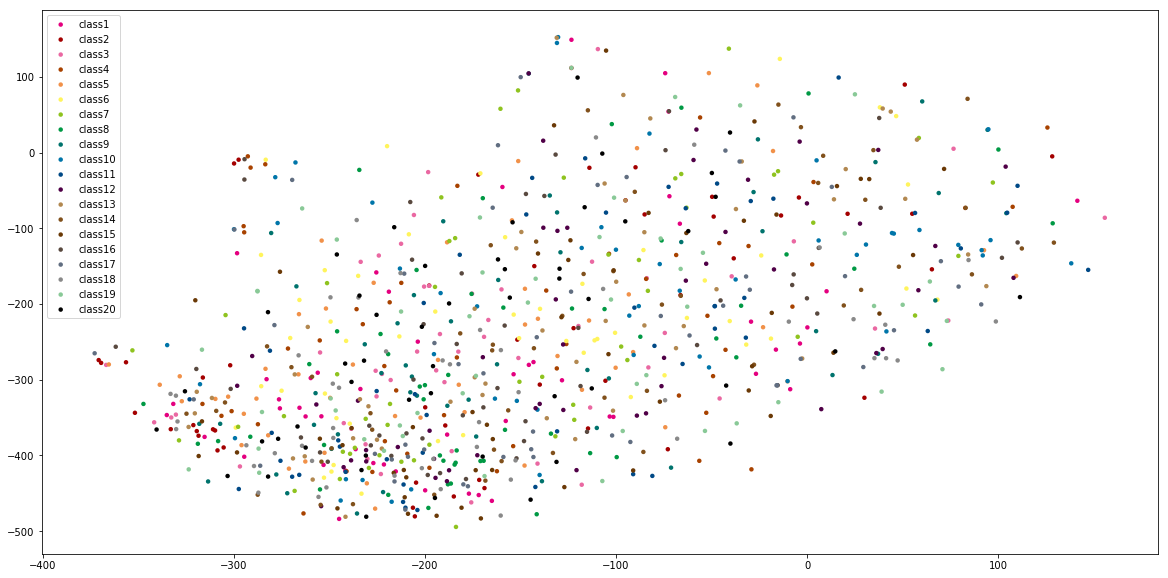

In [4]:
visulisation(data)

In [6]:
fc2_pre = pickle.load(open('fc2_pre','rb'))
cap_vec = pickle.load(open('cap_vec','rb'))
cap_vec.shape

(1000, 20)

In [7]:
captions_images_vectors = np.array([None]*1000)

for i in range(len(captions_images_vectors)):
    captions_images_vectors[i] = np.append(cap_vec[i],fc2_pre[i])

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=10, n_components=2, n_iter=5000,random_state=0)
low_dim_embs = tsne.fit_transform(list(captions_images_vectors[:]))

In [9]:
low_dim_embs_rs = low_dim_embs.reshape((20,50,2))

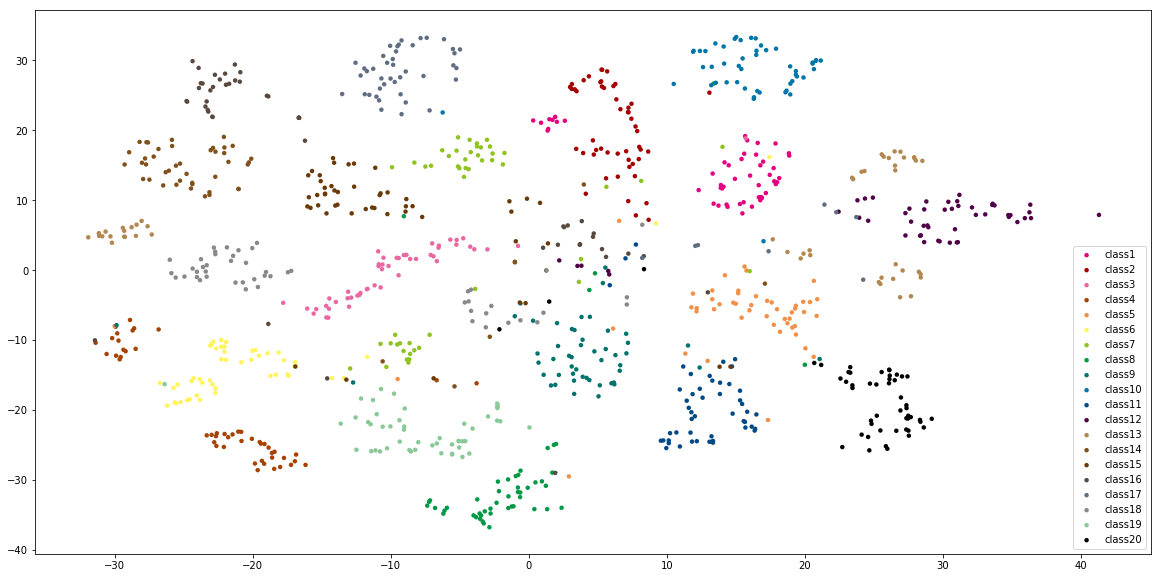

In [10]:
visualisation(low_dim_embs_rs)